In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [68]:
import numpy as np
np.random.seed(42)

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [4]:
hoda = scipy.io.loadmat('data\\Data_hoda_full.mat')
type(hoda)

dict

In [6]:
print(hoda.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


In [9]:
print(type(hoda['Data']))

<class 'numpy.ndarray'>


In [8]:
print(hoda['Data'].shape)

(60000, 1)


In [10]:
print(type(hoda['labels']))



<class 'numpy.ndarray'>


In [11]:
print(hoda['labels'].shape)

(60000, 1)


In [14]:
data= hoda['Data'].reshape(-1)
print(data.shape)

labels = hoda['labels'].reshape(-1)
print(labels .shape)


(60000,)
(60000,)


In [16]:
pic1_data = data[1]
pic1_label = labels[1]
pic1_data.shape



(20, 21)

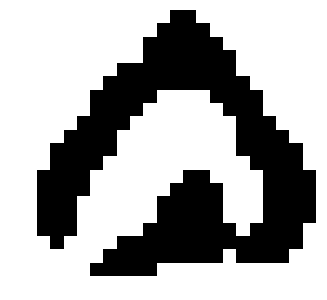

5


In [18]:
plt.figure(figsize = (5,5) )
plt.axis('off')
plt.imshow(pic1_data,cmap= matplotlib.cm.Greys)
plt.show()


In [19]:
print(pic1_label)

5


In [20]:
for i in range(1,10):
    print(data[i].shape)

(20, 21)
(10, 15)
(36, 17)
(36, 28)
(12, 14)
(26, 27)
(27, 28)
(13, 19)
(27, 20)


In [27]:
data_resized = np.array([cv2.resize(img, dsize=(5, 5)) for img in data])

In [22]:
for i in range(1,10):
    print(data_resized[i].shape)

(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)


In [23]:
data_resized[1]

array([[  0,   0, 255,   0,   0],
       [  0, 255, 128, 255,   0],
       [204,  51,   0,  51, 204],
       [255,   0, 255,   0, 255],
       [ 51, 229, 255, 153, 204]], dtype=uint8)

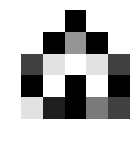

In [25]:
plt.figure(figsize = (2,2) )
plt.axis('off')
plt.imshow(data_resized[1],cmap= matplotlib.cm.Greys)
plt.show()


In [28]:
data_norm = data_resized/255
data_norm[1]

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.50196078, 1.        , 0.        ],
       [0.8       , 0.2       , 0.        , 0.2       , 0.8       ],
       [1.        , 0.        , 1.        , 0.        , 1.        ],
       [0.2       , 0.89803922, 1.        , 0.6       , 0.8       ]])

In [ ]:
plt.figure(figsize = (2,2) )
plt.axis('off')
plt.imshow(data_resized[1],cmap= matplotlib.cm.Greys)
plt.show()

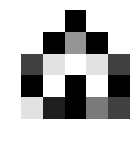

In [31]:
plt.figure(figsize = (2,2) )
plt.axis('off')
plt.imshow(data_norm[1],cmap= matplotlib.cm.Greys)
plt.show()

In [33]:
data_norm.shape

(60000, 5, 5)

In [34]:
data_norm = data_norm.reshape(60000,25)
data_norm.shape

(60000, 25)

In [57]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(data_norm,labels)

In [58]:
y_test.shape

(15000,)

In [59]:
n_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_test_cat = keras.utils.to_categorical(y_test,n_classes)

In [60]:
y_train_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
y_train_cat.shape

(45000, 10)

In [38]:
print("size of training dataset is: " +  str(X_train.shape))
print("size of test dataset is: " +  str(X_test.shape))

size of training dataset is: (45000, 25)
size of test dataset is: (15000, 25)


In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [70]:
model = Sequential()
model.add(Dense(50,activation = 'sigmoid', input_shape = (25,)))
model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))

In [71]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [72]:
model.fit(X_train,y_train_cat, batch_size = 512, epochs=100,verbose = 1)

Epoch 1/100
45000/45000 [==============================] - 1s 18us/step - loss: 2.2838 - acc: 0.1876
Epoch 2/100
45000/45000 [==============================] - 1s 11us/step - loss: 1.9674 - acc: 0.5026
Epoch 3/100
45000/45000 [==============================] - 0s 10us/step - loss: 1.3649 - acc: 0.5992
Epoch 4/100
45000/45000 [==============================] - 1s 11us/step - loss: 1.1067 - acc: 0.6785
Epoch 5/100
45000/45000 [==============================] - 1s 12us/step - loss: 0.9156 - acc: 0.7428
Epoch 6/100
45000/45000 [==============================] - 0s 10us/step - loss: 0.7535 - acc: 0.7798
Epoch 7/100
45000/45000 [==============================] - 0s 9us/step - loss: 0.6319 - acc: 0.8132
Epoch 8/100
45000/45000 [==============================] - 0s 9us/step - loss: 0.5415 - acc: 0.8362
Epoch 9/100
45000/45000 [==============================] - 0s 10us/step - loss: 0.4767 - acc: 0.8538
Epoch 10/100
45000/45000 [==============================] - 1s 11us/step - loss: 0.4312 - acc

In [67]:
model.evaluate(X_test,y_test_cat)

15000/15000 [==============================] - 0s 31us/step


[0.14266455941200257, 0.9506000000317891]

In [78]:
preds = model.predict_classes(X_test)

In [74]:
pred

array([5, 8, 1, ..., 9, 1, 9], dtype=int64)

In [75]:
y_test

array([5, 8, 1, ..., 8, 1, 9], dtype=uint8)

In [79]:
model = Sequential()
model.add(Dense(50,activation = 'relu', input_shape = (25,)))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(10, activation='softmax'))



In [80]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [81]:
model.fit(X_train,y_train_cat, batch_size = 512, epochs=100,verbose = 1)

Epoch 1/100
45000/45000 [==============================] - 1s 22us/step - loss: 1.3357 - acc: 0.6196
Epoch 2/100
45000/45000 [==============================] - 0s 10us/step - loss: 0.3556 - acc: 0.8860
Epoch 3/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.2684 - acc: 0.9137
Epoch 4/100
45000/45000 [==============================] - 1s 12us/step - loss: 0.2394 - acc: 0.9220
Epoch 5/100
45000/45000 [==============================] - 0s 9us/step - loss: 0.2209 - acc: 0.9276
Epoch 6/100
45000/45000 [==============================] - 0s 9us/step - loss: 0.2071 - acc: 0.9322
Epoch 7/100
45000/45000 [==============================] - 0s 10us/step - loss: 0.1959 - acc: 0.9356
Epoch 8/100
45000/45000 [==============================] - 1s 14us/step - loss: 0.1875 - acc: 0.9386
Epoch 9/100
45000/45000 [==============================] - 1s 12us/step - loss: 0.1794 - acc: 0.9407
Epoch 10/100
45000/45000 [==============================] - 0s 9us/step - loss: 0.1766 - acc: